<a href="https://colab.research.google.com/github/uujimin/-Jeju_Island_Tourist_Prediction/blob/main/%ED%8C%8C%EC%9D%BC_%EB%B6%88%EB%9F%AC%EC%98%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('OBS.csv', encoding='cp949')
data1 = pd.read_csv('빅콘.CSV', encoding='cp949')


In [ ]:
mask = data['지점명'] == '제주'
jeju_data=data.loc[mask, :]
jeju_data

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),...,평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C)
0,184,제주,2015-01,7.4,10.2,4.9,17.5,1.2,20150105,20150118,...,6.2,7.3,7.2,7.7,7.9,8.5,9.6,9.6,15.6,18.4
1,184,제주,2015-02,7.3,10.1,4.7,17.3,-0.7,20150221,20150208,...,7.5,7.6,7.3,7.5,7.6,7.8,8.0,7.7,12.2,16.9
2,184,제주,2015-03,10.4,13.6,7.3,22.2,0.2,20150331,20150310,...,12.4,11.5,11.1,10.9,10.7,10.5,9.6,8.9,11.1,15.8
3,184,제주,2015-04,15.1,19.2,12.0,27.7,7.0,20150402,20150414,...,17.1,16.5,16.2,15.9,15.6,15.4,13.7,12.6,12.1,14.9
4,184,제주,2015-05,18.8,22.7,15.9,29.4,11.0,20150514,20150505,...,23.4,21.9,21.6,21.2,20.8,20.4,18.1,16.3,14.7,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,184,제주,2022-04,15.5,19.6,11.9,26.7,5.6,20220425,20220403,...,19.1,17.4,17.3,17.2,16.7,16.4,14.8,13.9,13.9,16.5
88,184,제주,2022-05,19.4,23.1,15.8,29.0,9.5,20220527,20220503,...,24.4,21.6,21.5,21.6,21.2,20.8,18.8,17.2,15.6,16.1
89,184,제주,2022-06,23.9,27.5,21.1,34.4,17.3,20220626,20220605,...,28.3,25.9,26.0,25.9,25.4,24.9,22.5,20.4,17.9,16.5
90,184,제주,2022-07,28.4,31.8,25.7,36.0,23.2,20220728,20220716,...,32.5,30.4,30.6,30.6,30.2,29.5,27.2,24.8,22.0,17.7


In [56]:
def jeju_base(x):
  x = x.replace("-", "")
  return x

real_jeju_data['base_month'] = jeju_data["일시"].apply(jeju_base)
real_jeju_data["ref_view_cnt"]=data1['ref_view_cnt']
real_jeju_data["leis_sports_cnt"]=data1['leis_sports_cnt']
real_jeju_data

,base_month,평균기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),월합강수량(00~24h만)(mm),평균풍속(m/s),최대풍속(m/s),최대풍속 나타난날(yyyymmdd),최다풍향(16방위),평균운량(1/10),일조율(%),최심적설(cm),최심신적설(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),평균 최저초상온도(°C),최저초상온도 나타난날(yyyymmdd),ref_view_cnt,leis_sports_cnt
0,201501,7.4,20150105,20150118,82.4,3.9,12.9,20150101,320,6.5,29.73,1.8,1.8,20150101.0,20150101.0,3.5,20150118,521304.0,127063.0
1,201502,7.3,20150221,20150208,35.5,3.7,11.2,20150208,320,6.5,30.41,0.5,0.5,20150209.0,20150209.0,3.3,20150214,459032.0,134718.0
2,201503,10.4,20150331,20150310,80.7,2.9,10.9,20150310,320,5.3,49.50,0.0,0.0,20150310.0,20150310.0,5.5,20150310,490004.0,143528.0
3,201504,15.1,20150402,20150414,147.9,2.9,13.4,20150402,270,6.2,41.87,NaN,NaN,NaN,NaN,9.8,20150417,623087.0,146259.0
4,201505,18.8,20150514,20150505,150.0,2.6,10.1,20150512,250,5.3,55.67,NaN,NaN,NaN,NaN,14.4,20150505,628479.0,179944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,202204,15.5,20220425,20220403,84.0,2.8,10.8,20220414,50,5.0,60.57,NaN,NaN,NaN,NaN,7.0,20220403,843283.0,102377.0
88,202205,19.4,20220527,20220503,9.1,2.9,8.3,20220513,50,5.1,58.76,NaN,NaN,NaN,NaN,11.1,20220503,918511.0,94892.0
89,202206,23.9,20220626,20220605,143.6,3.3,11.7,20220624,50,6.3,49.42,NaN,NaN,NaN,NaN,19.5,20220602,970029.0,106281.0
90,202207,28.4,20220728,20220716,149.0,3.1,9.6,20220707,50,6.0,52.62,NaN,NaN,NaN,NaN,24.8,20220726,940925.0,93984.0


In [ ]:
real_jeju_data = jeju_data[["base_month", "평균기온(°C)","월합강수량(00~24h만)(mm)","평균풍속(m/s)","최대풍속(m/s)","최대풍속 나타난날(yyyymmdd)","최다풍향(16방위)","평균운량(1/10)","일조율(%)","최심적설(cm)","최심신적설(cm)","최심적설 나타난날(yyyymmdd)","최심신적설 나타난날(yyyymmdd)","평균 최저초상온도(°C)","최저초상온도 나타난날(yyyymmdd)"]]
real_jeju_data

,base_month,평균기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),월합강수량(00~24h만)(mm),평균풍속(m/s),최대풍속(m/s),최대풍속 나타난날(yyyymmdd),최다풍향(16방위),평균운량(1/10),일조율(%),최심적설(cm),최심신적설(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),평균 최저초상온도(°C),최저초상온도 나타난날(yyyymmdd)
0,201501,7.4,20150105,20150118,82.4,3.9,12.9,20150101,320,6.5,29.73,1.8,1.8,20150101.0,20150101.0,3.5,20150118
1,201502,7.3,20150221,20150208,35.5,3.7,11.2,20150208,320,6.5,30.41,0.5,0.5,20150209.0,20150209.0,3.3,20150214
2,201503,10.4,20150331,20150310,80.7,2.9,10.9,20150310,320,5.3,49.50,0.0,0.0,20150310.0,20150310.0,5.5,20150310
3,201504,15.1,20150402,20150414,147.9,2.9,13.4,20150402,270,6.2,41.87,NaN,NaN,NaN,NaN,9.8,20150417
4,201505,18.8,20150514,20150505,150.0,2.6,10.1,20150512,250,5.3,55.67,NaN,NaN,NaN,NaN,14.4,20150505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,202204,15.5,20220425,20220403,84.0,2.8,10.8,20220414,50,5.0,60.57,NaN,NaN,NaN,NaN,7.0,20220403
88,202205,19.4,20220527,20220503,9.1,2.9,8.3,20220513,50,5.1,58.76,NaN,NaN,NaN,NaN,11.1,20220503
89,202206,23.9,20220626,20220605,143.6,3.3,11.7,20220624,50,6.3,49.42,NaN,NaN,NaN,NaN,19.5,20220602
90,202207,28.4,20220728,20220716,149.0,3.1,9.6,20220707,50,6.0,52.62,NaN,NaN,NaN,NaN,24.8,20220726


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_boston  # 사이킷런 데이타셋
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # 경고무시

In [61]:
type(real_jeju_data['평균기온(°C)'][0])

numpy.float64

UFuncTypeError: ignored

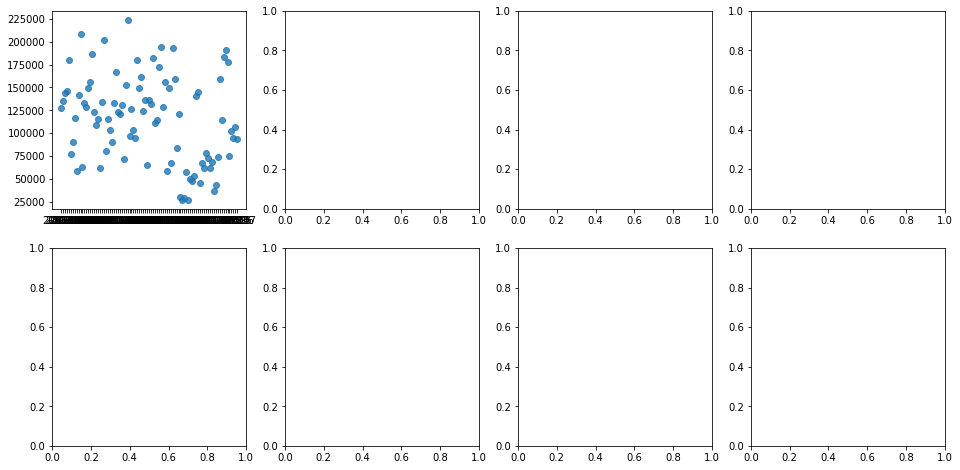

In [66]:
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ["base_month", "평균기온(°C)", "최고기온 나타난날(yyyymmdd)", "최저기온 나타난날(yyyymmdd)","월합강수량(00~24h만)(mm)","평균풍속(m/s)","최대풍속(m/s)","최다풍향(16방위)","평균운량(1/10)","일조율(%)","평균 최저초상온도(°C)","최저초상온도 나타난날(yyyymmdd)"]

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='leis_sports_cnt', data=real_jeju_data, ax=axs[row][col])

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
        # m_s_e, r2(선형회귀모델 적합도 : 분산값, 1에 가까울수록 적합도 높음)
real_jeju_data=real_jeju_data.drop([real_jeju_data.index[91]])
# feature, target 데이터 분리
y_target = real_jeju_data['leis_sports_cnt'] # 레이블(종속변수)
X_data = real_jeju_data.drop(['최심적설(cm)','최심신적설(cm)','최심적설 나타난날(yyyymmdd)','최심신적설 나타난날(yyyymmdd)','base_month','leis_sports_cnt','ref_view_cnt'], axis=1, inplace=False) # 피처(독립변수)

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.3, random_state=156)

# Linear Regression
lr = LinearRegression()

# fit 메소드 학습 : 주어진 데이터로 estimator(사이킷런이 제공) 알고리즘 학습
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
print(X_train.shape, X_test.shape)

(63, 12) (28, 12)


In [80]:
# predict 메소드 : 학습된 모델로 예측을 수행
y_preds = lr.predict(X_test)
y_preds[0:5]

array([ 75512.56819135,  50692.17359525, 108058.78788358,  82166.59627133,
        89710.06322842])

In [81]:
# rmse를 활용한 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 3967499019.193, RMSE: 62988.086
Variance score : -1.020


In [71]:
y_test

84    191206.0
86     74732.0
91         NaN
35     97218.0
13    128470.0
85    177948.0
39    180153.0
80     74382.0
74     78458.0
31    130712.0
8      58072.0
7     117021.0
64     57543.0
30    120423.0
57    193546.0
9     141554.0
33    152179.0
21    134321.0
73     62141.0
6      90603.0
83    183629.0
82    114236.0
5      76661.0
42    124283.0
18    109282.0
71     45276.0
89    106281.0
56     67494.0
Name: leis_sports_cnt, dtype: float64